This dataset was derived from the 1990 U.S. census, using one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

An household is a group of people residing within a home. Since the average number of rooms and bedrooms in this dataset are provided per household, these columns may take surpinsingly large values for block groups with few households and many empty houses, such as vacation resorts.

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

> This dataset was obtained from the StatLib repository:
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html. 

>It can be downloaded/loaded using: `sklearn.datasets.fetch_california_housing` function.

Firstly, lets start by importing some libraries which we will need during data analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings("ignore")

# Loading and Understanding the Dataset

In [ ]:
from sklearn.datasets import fetch_california_housing

iris = fetch_california_housing()

x_data = iris.data
x_features = iris.feature_names
y_data = iris.target

In [ ]:
data = pd.DataFrame(x_data, columns=x_features).join(pd.DataFrame(y_data, columns=["MedHouseVal"]))

data.shape

(20640, 9)

The dataset has 20640 rows and 9 columns

In [ ]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


The train dataset has 8 independent variables (known as feature) and 1 dependent variable (known as target):

Independent variables:

*   MedInc = Median income in block group
*   HouseAge = Median house age  in block group
*   AveRooms = Average number of rooms per household
*   AveBedrms = Average number of bedrooms per household
*   Population = Block group population
*   AveOccup = Average number of household members
*   Latitude = Block group latitude
*   Longitude = Block group longitude

Dependent variable:

*   MedHouseVal: Median house value for California's all districts, expressed in hundreds of thousands of dollars ($100,000)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

data["income_categories"] = pd.cut(data.MedInc,
                                   bins=[0.0, 3.0, 6.0, 9.0, 12.0, np.inf],
                                   labels=[1, 2, 3, 4, 5])

sss = StratifiedShuffleSplit(n_splits=1,
                             test_size=0.2,
                             random_state=42)

for train_index, test_index in sss.split(data, data.income_categories):
  stratified_train_data = data.loc[train_index]
  stratified_test_data = data.loc[test_index]

train_data = stratified_train_data.drop(["income_categories"], axis=1)
test_data = stratified_test_data.drop(["income_categories"], axis=1)

print("train_data.shape: ", train_data.shape)
print("test_data.shape: ", test_data.shape)

train_data.shape:  (16512, 9)
test_data.shape:  (4128, 9)


The dataset has been split into train and test data. We will train our model with the train dataset and will evaluate with the test dataset.


> We will explore only train dataset and will not touch the test dataset till modelling


In [ ]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,16512.0,3.869166,1.897169,0.499900,2.563975,3.531750,4.739600,15.000100
HouseAge,16512.0,28.696887,12.584584,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,16512.0,5.424163,2.313585,0.846154,4.443662,5.234136,6.049193,132.533333
AveBedrms,16512.0,1.094840,0.445399,0.333333,1.006745,1.048689,1.099143,34.066667
Population,16512.0,1427.294453,1135.026488,3.000000,788.000000,1168.000000,1733.000000,35682.000000
AveOccup,16512.0,3.063004,10.623259,0.692308,2.429528,2.816316,3.277736,1243.333333
Latitude,16512.0,35.635929,2.137030,32.540000,33.930000,34.260000,37.720000,41.950000
Longitude,16512.0,-119.574867,2.005323,-124.350000,-121.800000,-118.500000,-118.010000,-114.470000
MedHouseVal,16512.0,2.071417,1.155563,0.149990,1.194000,1.799000,2.654250,5.000010


The  numerical variables in the train dataset are described detailed in the table above as transpose.

> We can observe variable sizes, mean, standard deviation, minimum and maximum values of the variable observations in the table.

> We can also observe Q1 (%25), Q2 (%50, known as median value), Q3(%75) values to understand outlier distribution by comparing Q1 with minimum values and Q3 with maximum values in it's variable. If there is observable difference in the comparing, we can understand there is outlier.


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 7450 to 16247
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       16512 non-null  float64
 1   HouseAge     16512 non-null  float64
 2   AveRooms     16512 non-null  float64
 3   AveBedrms    16512 non-null  float64
 4   Population   16512 non-null  float64
 5   AveOccup     16512 non-null  float64
 6   Latitude     16512 non-null  float64
 7   Longitude    16512 non-null  float64
 8   MedHouseVal  16512 non-null  float64
dtypes: float64(9)
memory usage: 1.3 MB


1. There is no any missing value in the variables of the train dataset.

2. The variable types in the train dataset are described above as float64 (9). **That means all this variables are numerical, including the dependent variable, MedHouseVal. We can understand that the problem is a regression problem.**



#Exploratory Data Analysis

The train dataset has only numerical variables. That is why we will use some visualization methods like histplot, scatterplot, boxplot etc. 

Visualizing on Histogram

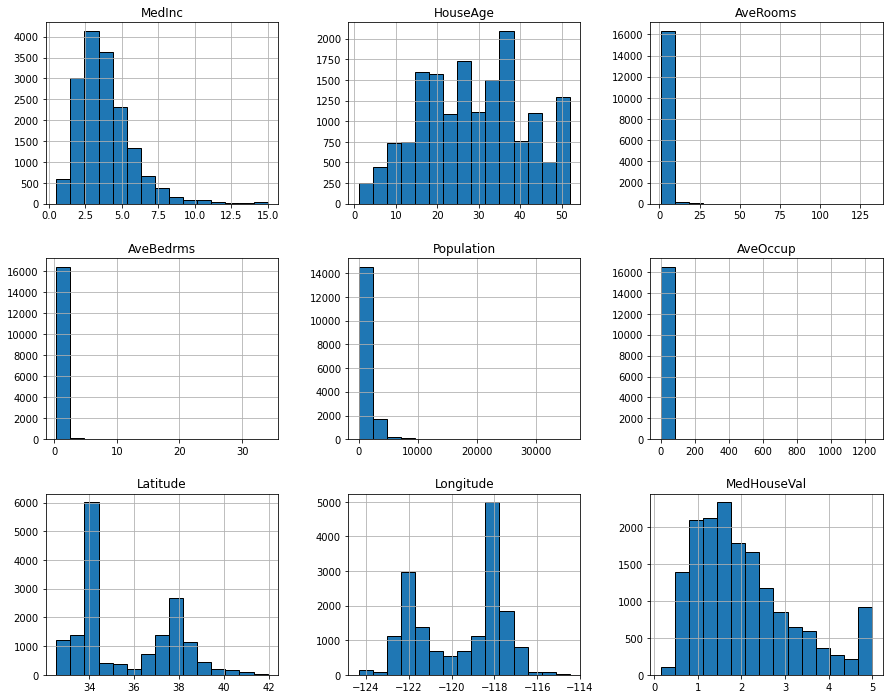

In [ ]:
train_data.hist(bins=15, edgecolor="black", figsize=(15,12))
plt.grid(True)
plt.show()

* The incomes has values between about 0.5 and 15.0 but the incomes are frequently between 1.0 and 6.0. There are some values which are so small. Maybe they are outliers.
* The houses ages have values between 1.0 and 52.0. They are frequently between about 15.0 and 37.0,
* There are too many values in about 34 and 38 latitutes, and in about -122 and -118 longitudes. That means people generally live there
* The house prices have values between 0.1 and 5.0. They are frequently between about 0.5 and 2.5 (50.000 Dolar and 250.000 Dolar). We understand that those who have high incomes (showed low density in MedInc) live in houses which are high values. For example, there is a jump in about 5.0 value. We can say that people who live there have high incomes.
* Average Rooms, Average Bedrooms, Population and Average Occupations features are not appropriate for histogram because their values. We can interpret this features on scatterplot

Visualizing Correlations of Some Features on the Dependent Variable by Scatterplot

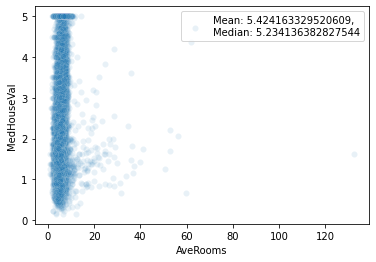

In [ ]:
sns.scatterplot(data=train_data, x="AveRooms", y="MedHouseVal", alpha=0.1, label="Mean: {}, \nMedian: {}".format(train_data.AveRooms.mean(), train_data.AveRooms.median()));

*   The number of rooms are frequently between 0 and 20. Median number of room is 5.23 and average number is 5.42. This numbers for a house in my opinion are a bit higher than normal. Then, it can be understood that people love living houses which have a bit more rooms
*   It can be observed in the figure there are some values (like 60, 140) which are most likely outliers.

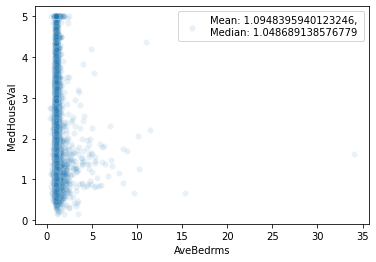

In [ ]:
sns.scatterplot(data=train_data, x="AveBedrms", y="MedHouseVal", alpha=0.1, label="Mean: {}, \nMedian: {}".format(train_data.AveBedrms.mean(), train_data.AveBedrms.median()));

*   The number of bedrooms are frequently between 0 and 5. Median number of bedroom is 1.04 and average number is 1.09. We can say that people generally live houses where the number of bedrooms is less
*   It can be observed in the figure there are some values in the figure (like 15, 25, 35) which are most likely outliers.



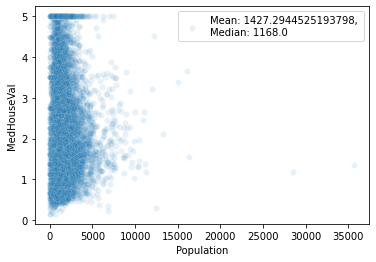

In [ ]:
sns.scatterplot(data=train_data, x="Population", y="MedHouseVal", alpha=0.1, label="Mean: {}, \nMedian: {}".format(train_data.Population.mean(), train_data.Population.median()));

*   The population are frequently between 0 and 5000. Median number of population is 1168.0 and average number is 1427. We can say that people generally live in houses where is not in big districts
*   The house prices in where population is little, are higher than house prices in where population is more. That is to say that the less population - the higher house value
*   There are some population values (like 30000, 35000) which are most likely outliers.

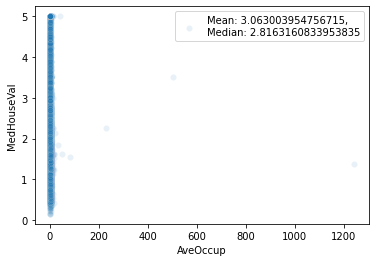

In [ ]:
sns.scatterplot(data=train_data, x="AveOccup", y="MedHouseVal", alpha=0.1, label="Mean: {}, \nMedian: {}".format(train_data.AveOccup.mean(), train_data.AveOccup.median()));

*   The median number of household's members is 2.81 and average number is 3.06. We can say that family sizes are not large
*   There are some values (around 100, 200, 400) which are most likely outliers.

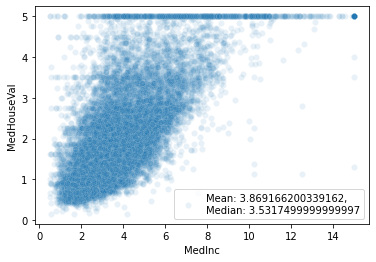

In [ ]:
sns.scatterplot(data=train_data, y="MedHouseVal", x="MedInc", alpha=0.1, label="Mean: {}, \nMedian: {}".format(train_data.MedInc.mean(), train_data.MedInc.median()));

* The median value of incomes is 3.53 and average value is 3.86. That is understood that those who have low income normally live in houses which are cheap. As income increases, the number of those, who live in more expensive houses, increases

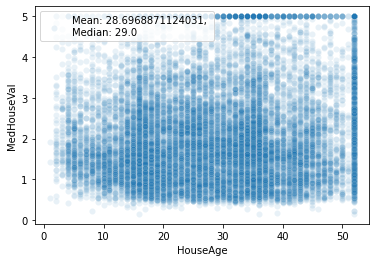

In [ ]:
sns.scatterplot(data=train_data, y="MedHouseVal", x="HouseAge", alpha=0.1, label="Mean: {}, \nMedian: {}".format(train_data.HouseAge.mean(), train_data.HouseAge.median()));

*   The median house age is 29.0, and 28.69 as average. That means houses in the districts of California are generally old.
*   The most of values of house ages are frequently in points which houses are cheap.



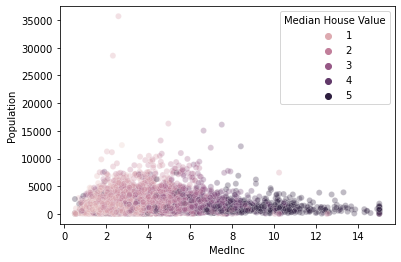

In [ ]:
sns.scatterplot(data=train_data, x="MedInc", y="Population", hue = "MedHouseVal", alpha = 0.3)
plt.legend(title="Median House Value", loc="upper right");

*  Incomes are low in where population is dense, and high where population is low.

*  Also, people who have high incomes live in houses which house prices are high. 



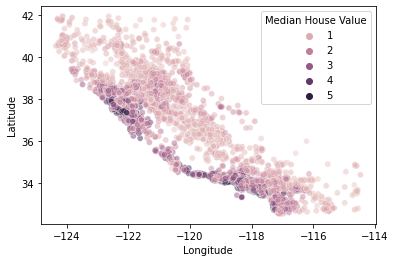

In [ ]:
sns.scatterplot(data=train_data, x="Longitude", y="Latitude", hue = "MedHouseVal", alpha = 0.5)
plt.legend(title="Median House Value", loc="upper right");

* In the figure above, we can actually see the map of california. We analyze that houses in coastland of California are expensive, and as going to inner city the prices are getting cheaper.

* As we mentioned above, houses which are high prices are in low density



Visualizing the Correlations between Variables by Clustermap

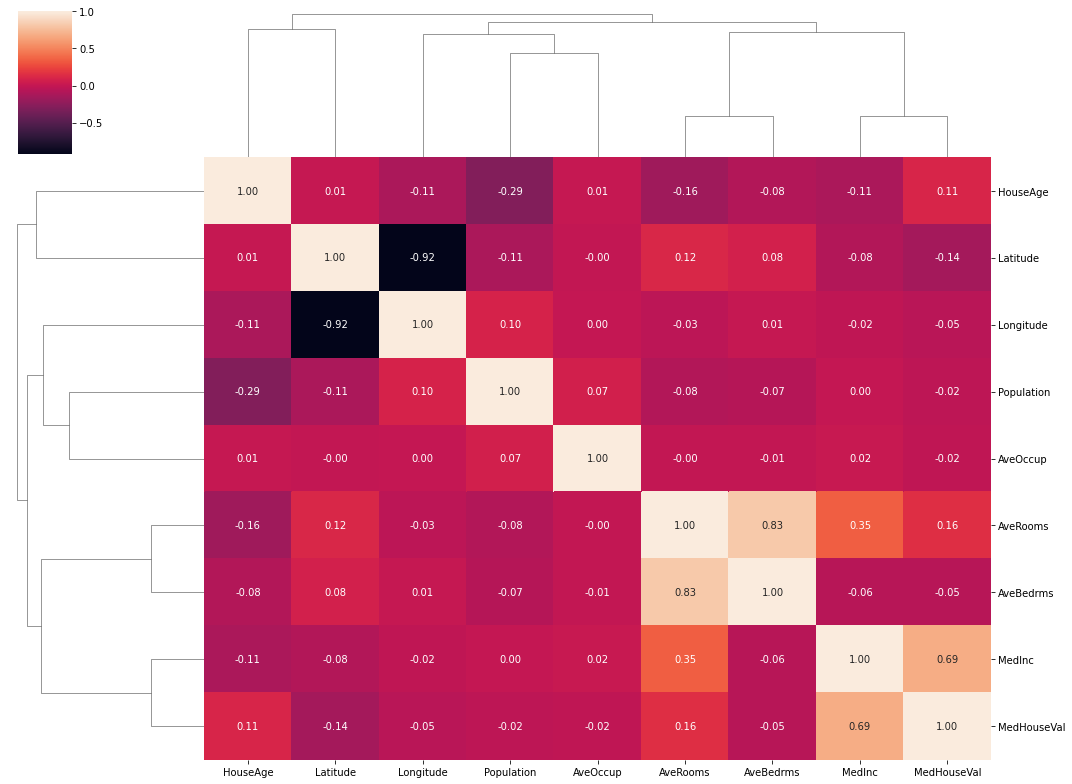

In [ ]:
corr_ = train_data.corr()

sns.clustermap(corr_, annot = True, fmt=".2f", figsize=(15,11));

In the clustermap above, there are dendograms which make us interpret the correlations between the variables with ease. The shorter dendogram lenght is, the higher correlation is. Now, lets interpret the clustermap;

1. ***Variables which have positive correlations*** (+ %10 or more);

*   AveRooms - AveBedrms (%83)
*   MedInc - MedHouseVal (%69)
*   MedInc - AveRooms (%35)
*   AveRooms - MedHouseVal (%16)
*   AveRooms - Latitude(%12)
*   HouseAge - MedHouseVal (%11)


> Others (correlations from 0 to +%10):


*   MedInc - Population
*   MedInc - AveOccup
*   HouseAge - AveOccup
*   HouseAge - Latitude
*   AveBedrms - Latitude
*   AveBedrms - Longitude
*   Population - Longitude
*   AveOccup - Population
*   AveOccup - Longitude


2. ***Variables which have negative correlations*** (- %10 or less);

*   Latitude - Longitude (-%92)
*   HouseAge - Population (-%29)
*   MedHouseVal - Latitude (-%14)
*   HouseAge - AveRooms (-%16)
*   MedInc - HouseAge (-%11)
*   Population - Latitude (-%11)
*   HouseAge - MedValueHouse (-%11)
*   HouseAge - Longitude (-%10)

>  Others (correlations from 0 to -%10):

* MedInc - AveBedrms
* MedInc - Latitude
* MedInc - Longitude
* HouseAge - AveBedrms
* AveRooms - Population
* AveRooms - AveOccup
* AveRooms - Longitude
* AveBedrms - Population
* AveBedrms - AveOccup
* AveBedrms - MedValHouse
* Population - MedHouseVal
* AveOccup - Latitude
* AveOccup - MedHouseVal
* MedHouseVal - Longitude

Visualizing the Target Feature's Correlations with Other Features on Heatmap

The correlations of the dependent variable (MedHouseVal) with the features are actually so important.

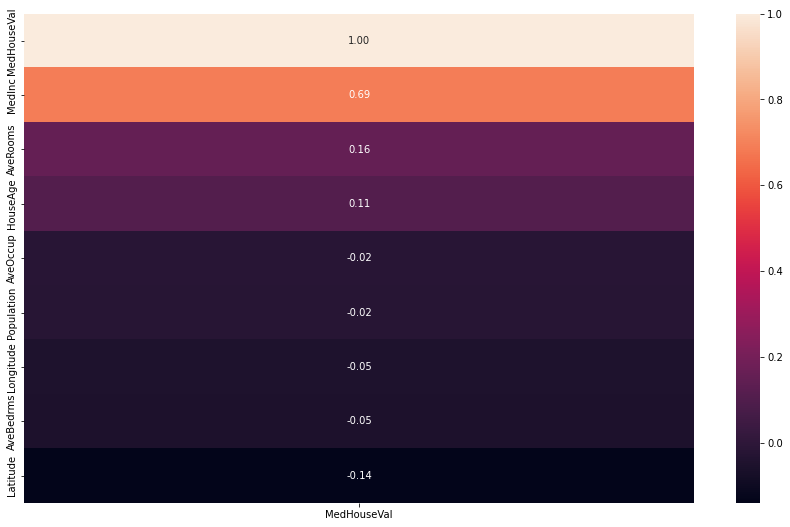

In [ ]:
corr_medhouseval=corr_[["MedHouseVal"]].sort_values(by="MedHouseVal", ascending=False)

plt.figure(figsize=(15,9))
sns.heatmap(corr_medhouseval, annot=True, fmt=".2f");

We can now interpret the correlations of the target variable with all the features in the heatmap above sorted as descending.

Accordig to the figure, the target variable, MedHouseVal, has the highest correlation with MedInc (%68). That means, as we mentioned above, the more income increases, the more people living in houses which are expensive increase at the rate of %68. We can interpret other possitive correlations like that.

For negative correlations, we can interpret opposite.

# Outlier Detection

Firstly, lets observe noisy datas in the train dataset.

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

clf=LocalOutlierFactor(n_neighbors=20).fit_predict(train_data)

train_data[clf != 1]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
17107,15.0001,31.0,9.425101,1.093117,722.0,2.923077,37.44,-122.20,5.00001
15686,4.0156,48.0,3.636804,1.083132,1980.0,1.598063,37.79,-122.42,5.00001
20451,6.9712,5.0,7.241806,1.012363,11956.0,3.437608,34.26,-118.90,3.21300
20225,2.3669,50.0,3.994891,1.053640,2535.0,3.237548,34.29,-119.30,1.65300
1024,3.1500,16.0,29.852941,5.323529,202.0,1.980392,38.52,-120.00,1.40600
...,...,...,...,...,...,...,...,...,...
11870,3.3462,14.0,18.348754,3.131673,616.0,2.192171,40.25,-121.15,1.45200
13366,4.2578,36.0,5.258824,1.117647,2886.0,33.952941,33.94,-117.63,1.83300
9683,3.2917,10.0,34.571429,7.022321,483.0,2.156250,37.63,-118.99,2.31800
9676,3.2431,14.0,52.848214,11.410714,265.0,2.366071,37.64,-119.02,2.21400


The table above shows us noisy datas in the train dataset. The dataset has 115 noisy rows. We have 2 way to overcome the noises. 
>
We will either:
*   replace the noises with appropriate observations,
>or
*   remove all noisy datas.

> We will choice SECOND way.

In [ ]:
train_data = train_data[clf != -1]

In [ ]:
train_data.shape

(16397, 9)

The shape of the train dataset was previously (16512, 9), but now it is (16397, 9). 115 noisy observations are removed from the train dataset


Secondly, we will build a function visualizing the variables of the train dataset by boxplot to show us outliers, and giving further informations

In [ ]:
def outlier_process(data, var, type="reporting"):
  
  Q1 = data[var].quantile(0.25)
  Q3 = data[var].quantile(0.75)
  IQR = Q3 - Q1
  low_outlier_gate = Q1 - IQR*1.5
  up_outlier_gate = Q3 + IQR*1.5

  outlier_number = len(data[var][data[var] < low_outlier_gate]) + len(data[var][data[var] > up_outlier_gate])

  if type=="visualizing":

    sns.boxplot(data=data, x=var)
    plt.title(var.upper())
    plt.show() 

    print("As we can see in the figure above;")
    print(f"Low outlier gate of '{var.upper()}' variable:", round(low_outlier_gate,2))
    print(f"Median value of '{var.upper()}' variable:", data[var].median())
    print(f"Up outlier gate of '{var.upper()}' variable:", round(up_outlier_gate,2))
    print(f"Outlier number of '{var.upper()}' variable:", outlier_number)
    print(f"-"*32)
    
  elif type=="reporting":
            
    if outlier_number == 0:
        print(f"{var} has no any outlier")
    else:
        print(f"{var} variable has some outliers: ", outlier_number)
      
  elif type=="pressing":
        
    data[var] = [low_outlier_gate if i < low_outlier_gate else up_outlier_gate if i > up_outlier_gate else i for i in data[var]]

    return data

This function gets 3 parameters: 

1.   data = a dataset name
2.   var = a variable name of the dataset
3.   type = the process type. 

> the "type" parameter gets 3 different inputs: "visualizing", "pressing" and "reporting". 


*   "visualizing" shows outliers of a variable of dataset by boxplot and gives further infomations

*   "pressing" transforms the outliers into low_outlier_gate or up_outlier_gate of its variable

*    "reporting" shows only which variables have outlier, and how much

Lets start seeing outliers in all the variables of the train dataset by boxplot and get further infomations

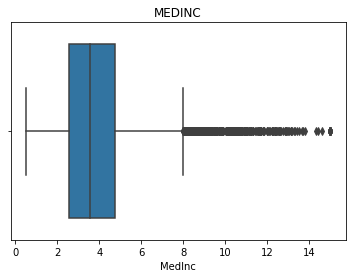

As we can see in the figure above;
Low outlier gate of 'MEDINC' variable: -0.69
Median value of 'MEDINC' variable: 3.5313
Up outlier gate of 'MEDINC' variable: 7.99
Outlier number of 'MEDINC' variable: 520
--------------------------------


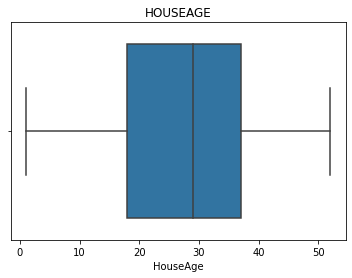

As we can see in the figure above;
Low outlier gate of 'HOUSEAGE' variable: -10.5
Median value of 'HOUSEAGE' variable: 29.0
Up outlier gate of 'HOUSEAGE' variable: 65.5
Outlier number of 'HOUSEAGE' variable: 0
--------------------------------


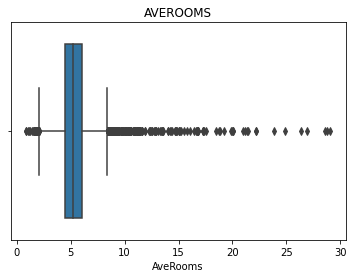

As we can see in the figure above;
Low outlier gate of 'AVEROOMS' variable: 2.06
Median value of 'AVEROOMS' variable: 5.227504244482173
Up outlier gate of 'AVEROOMS' variable: 8.42
Outlier number of 'AVEROOMS' variable: 353
--------------------------------


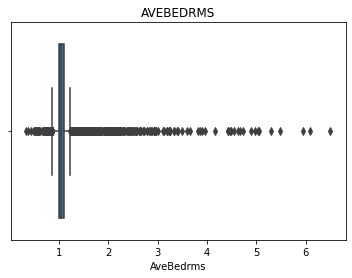

As we can see in the figure above;
Low outlier gate of 'AVEBEDRMS' variable: 0.87
Median value of 'AVEBEDRMS' variable: 1.0483870967741935
Up outlier gate of 'AVEBEDRMS' variable: 1.24
Outlier number of 'AVEBEDRMS' variable: 1106
--------------------------------


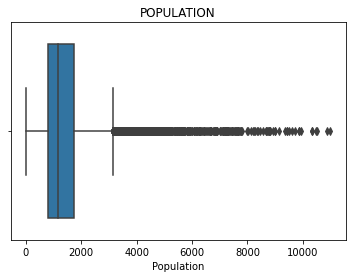

As we can see in the figure above;
Low outlier gate of 'POPULATION' variable: -625.5
Median value of 'POPULATION' variable: 1170.0
Up outlier gate of 'POPULATION' variable: 3146.5
Outlier number of 'POPULATION' variable: 949
--------------------------------


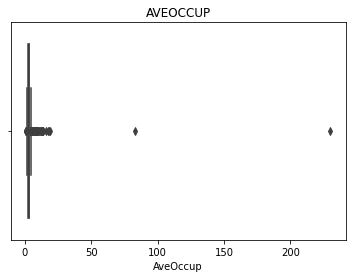

As we can see in the figure above;
Low outlier gate of 'AVEOCCUP' variable: 1.16
Median value of 'AVEOCCUP' variable: 2.81651376146789
Up outlier gate of 'AVEOCCUP' variable: 4.55
Outlier number of 'AVEOCCUP' variable: 565
--------------------------------


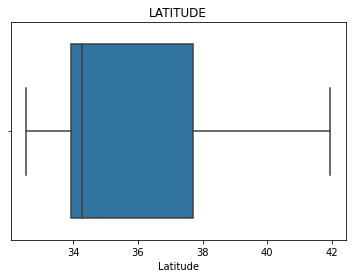

As we can see in the figure above;
Low outlier gate of 'LATITUDE' variable: 28.24
Median value of 'LATITUDE' variable: 34.26
Up outlier gate of 'LATITUDE' variable: 43.4
Outlier number of 'LATITUDE' variable: 0
--------------------------------


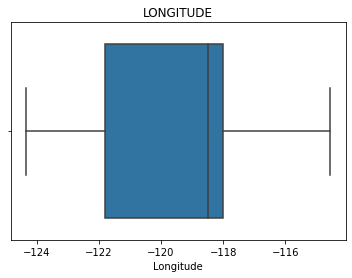

As we can see in the figure above;
Low outlier gate of 'LONGITUDE' variable: -127.48
Median value of 'LONGITUDE' variable: -118.5
Up outlier gate of 'LONGITUDE' variable: -112.33
Outlier number of 'LONGITUDE' variable: 0
--------------------------------


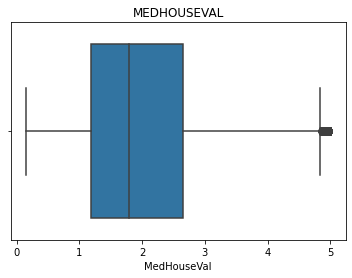

As we can see in the figure above;
Low outlier gate of 'MEDHOUSEVAL' variable: -0.99
Median value of 'MEDHOUSEVAL' variable: 1.798
Up outlier gate of 'MEDHOUSEVAL' variable: 4.83
Outlier number of 'MEDHOUSEVAL' variable: 818
--------------------------------


In [ ]:
for var in train_data.columns:
  outlier_process(data=train_data, var=var, type="visualizing")

1. We called the outlier_process() function with "type = 'visualizing'" parameter by using for loop
2. The boxplot figures above give us some informations about which variables have outlier and how much. To make the informations clearer, the variables including outliers in the train dataset:

*   **MedInc**:  520
*   **AveRooms**:  353
*   **AveBedrms**:  1106
*   **Population**:  949
*   **AveOccup**:  565
*   **MedHouseValue**:  818

> HouseAge, Latitude and Longitude features have no outlier



There are generally 3 ways to overcome the outlier values;

1. Replace the outlier values with median or mean value of its variable
2. Pressing the outlier values into the low_outlier_gate or up_outlier_gate value of its variable.
  * low_outlier_gate value if less than low_outlier_gate value
  * up_outlier_gate value if higher than up_outlier_gate value
3. Dropping the outlier values together with rows they are in.

We will use the SECOND way. Because;

*   The FIRST way replacing with median and mean value leads to some noises. 
*   The THIRD way dropping values from the data leads to data loss.
*   However, the SECOND way leads to less noisy and data loss

Now, we will call the outlier_process() again, but now with 'type="pressing"' parameter to change the outlier values by using a for loop.

In [ ]:
for var in train_data.columns:
  train_data = outlier_process(train_data, var, type="pressing")

We called outlier_process() function with a for loop to change all the outliers at the same time. The for loop pressed all the outlier values into low_outlier_gate or up_outlier_gate of its variable.

Lets get a report of only the outlier numbers of the variables in the train dataset by calling the function with "type = 'reporting'" parameter

In [ ]:
for var in train_data.columns:
  outlier_process(train_data, var, type="reporting")

MedInc has no any outlier
HouseAge has no any outlier
AveRooms has no any outlier
AveBedrms has no any outlier
Population has no any outlier
AveOccup has no any outlier
Latitude has no any outlier
Longitude has no any outlier
MedHouseVal has no any outlier


Lets check last time whether there is noisy observation or not 

In [ ]:
last_clf=LocalOutlierFactor(n_neighbors=20).fit_predict(train_data)

train_data[last_clf != 1].shape

(30, 9)

*  Altought there is no outlier value, there are 30 noisy observations in the train dataset. We should know that there are some noisy datas which they cannot be prevented even in the real life. Also, the amount of noises are too little.

#Preparing the Train Dataset for Modelling

In [ ]:
X_train = train_data.drop(["MedHouseVal"], axis=1).values
y_train = train_data.MedHouseVal.values.reshape(-1,1)

> We have split the train dataset as X_train and y_train

*   X_train = the independent variables (features)
*   y_train = the dependent variable (target)

> ML models will be trained with the train dataset, and will be validated by 10 validation datas (cv=10). 
We won't touch the test dataset until we make our model better.


We should normalize all the observations of independent variables from 0 to 1.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

pipeline = Pipeline([
                     ("imputer", SimpleImputer(strategy="mean")),
                     ("scaler", MinMaxScaler(feature_range=(0,1)))
                    ]).fit(X_train)

X_train = pipeline.transform(X_train) #We will use pipeline for test dataset in the end of model tunning.

What we did in the code above;
* We have imported Pipeline to use several libraries together. 
* We have imported SimpleImputer to fill missing values with mean value. However, there was no any missing value in the train dataset, then why we called it? It is because of the test dataset. The test dataset may have missing value. When we call this pipeline variable for test dataset, missing values will be filled with mean value, if any
* We have imported MinMaxScaler. It's because the train and test datasets have continuous features. It may lead to ML models not to be trained well. The models work better with normalized observations. We imported MinMaxScaler with feature_range=(0,1) parameter which assign values from 0 to 1 according to their values.

#Modelling

Firsty, lets import some ***Ensemble Regression Models*** and ***Evaluation Metrics***

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
!pip install catboost
from catboost import CatBoostRegressor

from sklearn.model_selection import learning_curve, cross_val_score, KFold
from sklearn.metrics import r2_score, mean_squared_error

Secondly, we will build a class for visualizing performances of models according to sizes of the train data, building models and model tuning

In [ ]:
class RegressionModelling():
  
  def __init__(self, **kwargs):

    super().__init__()

  def learningcurve(self, alg, X_train, y_train, scoring="r2"):
    super().__init__()

    train_size = len(X_train)
    train_size, train_scores, val_scores = learning_curve(
                                                          alg,
                                                          X_train, y_train,
                                                          cv=KFold(n_splits=10, shuffle=True, random_state=42),
                                                          scoring=scoring
                                                          )
    train_score, val_score = np.mean(train_scores, axis=1), np.mean(val_scores, axis=1)

    plt.plot(train_size, train_score, label="Train Score")
    plt.plot(train_size, val_score, label="Validate Score")
    plt.title(f"{alg.__class__.__name__} Learning Curve")
    plt.xlabel("Data Size")
    plt.ylabel("Score")
    plt.grid(True)
    plt.legend()
    print("-"*50)
    return plt.show()

  def build_model(self, alg, X_train, y_train):
     super().__init__()

     model = alg.fit(X_train, y_train)
     train_pred = model.predict(X_train)
     train_scores.append(r2_score(y_train, train_pred)) #to check overfitting by storing.

     val_r2 = cross_val_score(
                                alg,
                                X_train, y_train,
                                cv=KFold(n_splits=10, shuffle=True, random_state=42),
                                scoring="r2"
                                )
     val_scores.append(np.mean(val_r2)) #to check model's performance and sensibility by storing

     val_mse = cross_val_score(
                                alg,
                                X_train, y_train,
                                cv=KFold(n_splits=10, shuffle=True, random_state=42),
                                scoring="neg_mean_squared_error"
                                )

     val_rmses.append(round(np.sqrt(np.mean(-val_mse)),3)) #to store test dataset's RMSE

     print(f"The process for {alg.__class__.__name__} is over.")

  def model_tuning(self, alg, params, X_train, y_train):
    super().__init__()

    cv_model = GridSearchCV(
                            alg,
                            params,
                            cv=KFold(n_splits=10, shuffle=True, random_state=42),
                            scoring="r2",
                            n_jobs=-1,
                            verbose=1
                            ).fit(X_train, y_train)

    cv_train_scores.append(r2_score(y_train, cv_model.best_estimator_.predict(X_train)))
                   

    cv_cross_vals_mse = cross_val_score(
                                        cv_model.best_estimator_,
                                        X_train, y_train,
                                        cv=KFold(n_splits=10, shuffle=True, random_state=42),
                                        scoring="neg_mean_squared_error"
                                        )

    cross_rmses.append(round(np.sqrt(np.mean(-cv_cross_vals_mse)),3)) #to store test dataset's RMSE
    best_params.append(cv_model.best_params_)      
    best_scores.append(cv_model.best_score_)

    print(f"The process for {alg.__class__.__name__} is over.")

In [ ]:
model_list = [
             RandomForestRegressor(random_state=42),
             AdaBoostRegressor(random_state=42),
             GradientBoostingRegressor(random_state=42),
             XGBRegressor(objective="reg:squarederror", random_state=42),
             LGBMRegressor(random_state=42),
             CatBoostRegressor(random_state=42, verbose=False)
             ]

##Visualizing the Scores According to the Size

Lets call the learningcurve() function to visualize how the models react to the size of the train dataset 

--------------------------------------------------


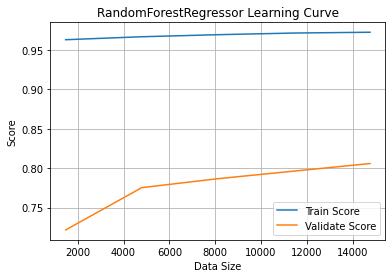

--------------------------------------------------


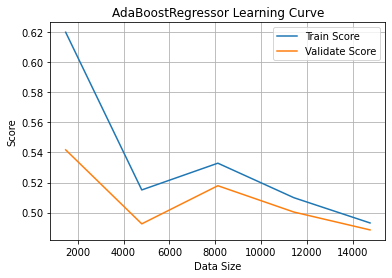

--------------------------------------------------


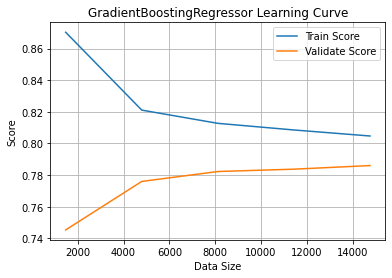

--------------------------------------------------


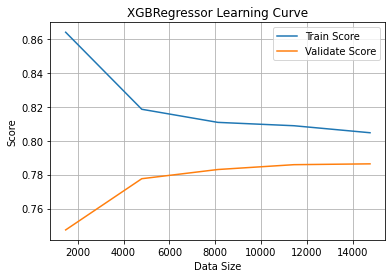

--------------------------------------------------


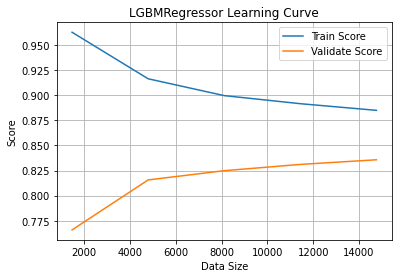

--------------------------------------------------


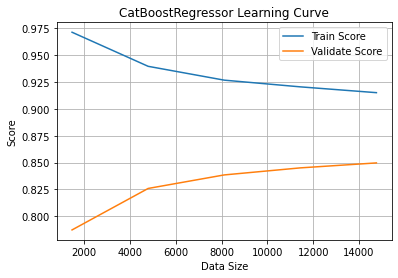

In [ ]:
for model in model_list:
  
  modelling = RegressionModelling()
  modelling.learningcurve(model, X_train, y_train)

According to all the figures above, we'd better not split the train_data into train and validation datasets. This is because the train and test scores are close to come together in the last index in all the figures. It means the more data exists, the better models work


> We will validate the model with cross_val_score by choosing cv=10



## Modelling

It is now time to build the models and to store their results as list

In [ ]:
model_names = []
train_scores = []
val_scores = []
val_rmses = []

for model in model_list:
  
  model_names.append(model.__class__.__name__)
  
  modelling = RegressionModelling()
  modelling.build_model(model, X_train, y_train)

The process for RandomForestRegressor is over.
The process for AdaBoostRegressor is over.
The process for GradientBoostingRegressor is over.
The process for XGBRegressor is over.
The process for LGBMRegressor is over.
The process for CatBoostRegressor is over.


We have stored the model names, train scores, validation scores and RMSEs as lists. Now lets check the results as DataFrame by sorting according to "RMSE"

In [ ]:
model_data = pd.DataFrame({
                           "Model_Names": model_names,
                           "Train_Scores": train_scores,
                           "Val_Score_Means": val_scores,
                           "Val_RMSE_Means": val_rmses
                           }).sort_values(by="Val_RMSE_Means", ascending=True)

model_data

,Model_Names,Train_Scores,Val_Score_Means,Val_RMSE_Means
5,CatBoostRegressor,0.913025,0.849720,0.438
4,LGBMRegressor,0.882740,0.835570,0.458
0,RandomForestRegressor,0.972938,0.805938,0.498
2,GradientBoostingRegressor,0.802754,0.786152,0.522
3,XGBRegressor,0.803427,0.786666,0.522
1,AdaBoostRegressor,0.564068,0.480450,0.814


As we can see in the table above, the train dataset is appropriate for the ensemble models. But we should be careful about overfitting. Lets evaluate all the models and choose only the best 3 models for model tuning


1.   ***CatBoostRegressor*** has %91 train score and %85 validation scores mean with 10 validation datasets. The mean of it's RMSEs coming from the validation datasets are 0.438. It seems like there is a bit overfitting but considerable to use
2.   ***LGBMRegressor*** has %88 train score and %84 validation scores mean with 10 validation datasets. The mean of it's RMSEs coming from the validation datasets are 0.458. It seems like there is a bit overfitting but considerable to use
3.   ***RandomForestRegressor*** has %97 train score and %81 validation scores mean with 10 validation datasets. The mean of it's RMSEs coming from the validation datasets are 0.498. It seems like there is overfitting because the train score is more higher than validation scores mean. These results are not like we want. Lets take the model for model tuning and see how it will react
4.   ***GradientBoostingRegressor*** has %80 train score and %79 validation scores mean with 10 validation datasets. The mean of it's RMSEs coming from the validation datasets are 0.522.
5.   ***XGBRegressor*** has %80 train score and %79 validation scores mean with 10 validation datasets. The mean of it's RMSEs coming from the validation datasets are 0.522. These results are similar to GradientBoostingRegressor.
6.   ***AdaBoostRegressor*** has %56 train score and %48 validation scores mean with 10 validation datasets. The mean of it's RMSEs coming from the validation datasets are 0.814. Unfortunately, it has not good results.




# Model Tuning with GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

# Models
cv_models = [
            CatBoostRegressor(random_state=42, verbose=False),
            RandomForestRegressor(random_state=42),
            LGBMRegressor(random_state=42),
            ]

# Parameters
cv_cat_params = {"n_estimators": [50, 100, 200, 500],
                 "learning_rate": [1e-4, 1e-3, 1e-2, 1e-1],
                 "depth": np.arange(1, 10, 2)}

cv_rf_params = {"n_estimators": [50, 100, 200, 500],
                 "min_samples_split": [10, 30, 50, 100],
                 "max_depth": np.arange(1, 10, 2)}

cv_lgbm_params = {"n_estimators": [50, 100, 200, 500],
                 "learning_rate": [1e-4, 1e-3, 1e-2, 1e-1],
                 "max_depth": np.arange(1, 10, 2)}

params_list = [cv_cat_params, cv_rf_params, cv_lgbm_params] 

# to store last results
cv_model_names=[]
cv_train_scores = []
best_scores = []
cross_rmses = []
best_params = []

# for loop
for i in range(len(cv_models)):

  cv_model_names.append(cv_models[i].__class__.__name__)

  cv_modelling=RegressionModelling()
  cv_modelling.model_tuning(cv_models[i], params_list[i], X_train, y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits
The process for CatBoostRegressor is over.
Fitting 10 folds for each of 80 candidates, totalling 800 fits
The process for RandomForestRegressor is over.
Fitting 10 folds for each of 80 candidates, totalling 800 fits
The process for LGBMRegressor is over.


The parameter list means that GridSearchCV will apply all the parameters one by one on the models. After model tuning, GridSearchCV will give which parameters are the best to get best score.

In [ ]:
cv_model_data = pd.DataFrame({
                           "Cv_Model_Names": cv_model_names,
                           "Cv_Train_Sores": cv_train_scores,
                           "Cv_Val_Averages": best_scores,
                           "Cross_RMSEs_Means": cross_rmses,
                           "Best_Params": best_params
                           }).sort_values(by="Cross_RMSEs_Means", ascending=True)

cv_model_data.head()

,Cv_Model_Names,Cv_Train_Sores,Cv_Val_Averages,Cross_RMSEs_Means,Best_Params
0,CatBoostRegressor,0.944868,0.850820,0.436,"{'depth': 9, 'learning_rate': 0.1, 'n_estimato..."
2,LGBMRegressor,0.949043,0.848991,0.439,"{'learning_rate': 0.1, 'max_depth': 9, 'n_esti..."
1,RandomForestRegressor,0.832446,0.768468,0.543,"{'max_depth': 9, 'min_samples_split': 10, 'n_e..."


According to the results, CatBoostRegressor has increased both the train and validation scores and decreased RMSE a bit. Overfitting still exist, but again it is the best. It has been choosen for our problem.

# Testing the Model on the Test Dataset

We have tuned our models and choosen CatBoostRegressor with the parameters. Lets now touch the test dataset which the model has not seen by now.

In [ ]:
X_test = test_data.drop(["MedHouseVal"], axis=1)
y_test = test_data.MedHouseVal.values.reshape(-1,1)

X_test = pipeline.transform(X_test)

We firstly have split the test dataset into X_test (datas) and y_test (target). After that, the pipeline has been called for X_test to be transformed

In [ ]:
cat_model = CatBoostRegressor(n_estimators= 500, learning_rate= 0.1, depth= 9, random_state=42, verbose=False).fit(X_train, y_train)

test_pred = cat_model.predict(X_test)
print("Accuracy of the Model on the Test Dataset: %", r2_score(y_test, test_pred)*100)
print("RMSE of the Model on the Test Dataset:", np.sqrt(mean_squared_error(y_test, test_pred)))

Accuracy of the Model on the Test Dataset: % 85.50548852800488
RMSE of the Model on the Test Dataset: 0.43684821345516794


The model has %85.50 accuracy score and 0.436 RMSE on the test dataset. This results are not bad. Lets save and load the model and finish...

In [ ]:
cat_model.save_model("CatBoostRegressor_on_California_Houses_Pred.h5")

In [ ]:
loaded_model = CatBoostRegressor().load_model("CatBoostRegressor_on_California_Houses_Pred.h5")

In [ ]:
loaded_model.get_params()

{'depth': 9,
 'iterations': 500,
 'learning_rate': 0.1,
 'loss_function': 'RMSE',
 'random_seed': 42,
 'verbose': 0}